# Úkol č. 1 - část 2 - čištění dat, vývoj obhájených prací

* Tato část (druhá ze tří) obsahuje následující:
    * Načtení dat z jednotného csv souboru data.csv ve složce CSV a zkrácení jmen vedoucích a oponentů abych se vyhnula duplicitám.
    * Počty prací od každého typu (Bc., Ing. a Mgr.)
    * Počty obhájených prací v průběhu let, také podle typu
    * Poměry obhájených prací vůči neobhájených nebo nedokončených, také podle typu. Zde je vidět, že za rok 2018 ještě neproběhlo velké množství obhajob. Za první tři roky se pravděpodobně neobhájené práce neukládaly do systému.
    
    * 3. část se zbytkem úkolu je v notebooku s názvem homework_01_B181_data_management_more


In [1]:
### odtud už je to Vaše
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data from CSV
dt = pd.read_csv("CSV/data.csv", sep=';')
#rename first column
dt.rename(columns={"Unnamed: 0" : "Id"}, inplace=True)

# odstraneni nevyplnenych dat - hlavne jmena oponentu a vedoucich
dt = dt.replace('', np.nan, regex=True)

In [ ]:
# Jelikoz jmena vedoucich a oponentu se v prubehu let doplnuji o tituly, je potreba je sjednotit
# abychom zbytecne nemeli "dvojniky."
# Pri tomto procesu je samozrejme nebezpeci slouceni dvou ruznych lidi s jednim jmenem.
# Takovych pripadu na ziskanych datech neni mnoho, jsou-li vubec nejake.

def shorten_names(dt = object):
    for index, row in dt.iterrows():
        #print(getattr(row, "name"))
        name_sup = str(row[8])
        name_opo = str(row[4])
        #print(name_sup+" "+name_opo)
        
        for index2, row2 in dt.iterrows():
            if(index == index2):
                continue
            name_sup2 = str(row2[8])
            name_opo2 = str(row2[4])
            #
            #print(name_opo+" "+name_opo2)
            if(name_sup != 'nan' and name_sup in name_sup2 and name_sup != name_sup2):
                #print(name_sup+" "+name_sup2)
                #print("changing supervisor: "+name_sup2+" to "+name_sup)
                dt.at[index2, 'supervisor']= name_sup
            if(name_opo != 'nan' and name_opo in name_opo2 and name_opo != name_opo2):
                #print("changing oponent: "+name_opo2+" to "+name_opo)
                dt.at[index2, 'oponent']= name_opo  
    
    return dt

dt = shorten_names(dt)

In [ ]:
#save file again
dt.to_csv("./CSV/data_names.csv",sep=';')

In [ ]:
#pocty jednotlivych typu praci
types = dt['type'].unique()
for typ in types:
    a = dt.loc[dt.type==typ]
    print('Počet prací typu '+typ+": "+str(a.shape[0]))

Počet prací typu Bc.: 2422
Počet prací typu Mgr.: 287
Počet prací typu Ing.: 1095


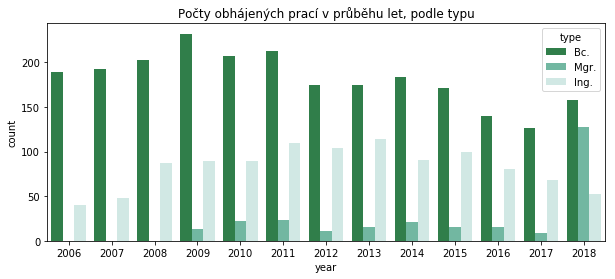

In [ ]:
data = dt.loc[dt.defended==1]
plt.figure(figsize=(10,4)) 
plt.title("Počty obhájených prací v průběhu let, podle typu") 
sns.countplot(x="year", hue="type", data=data, palette=sns.color_palette("BuGn_r", 3))
plt.show()

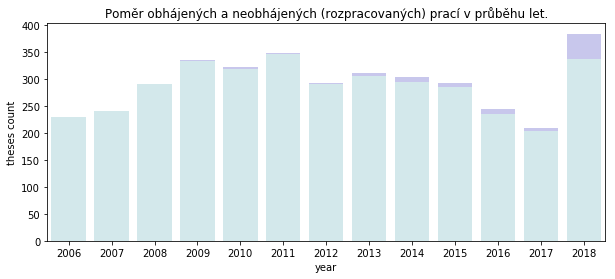

In [ ]:
dat = pd.DataFrame()
years = dt['year'].unique()
years.sort(axis=0)

dat['year'] = years
dat['defended'] = 0
dat['other'] = 0
dat['all'] = 0
index=0
for year in years:
    count_def = len(dt[(dt['year'] == year) & (dt['defended'] == 1)])
    count_other = len(dt[(dt['year'] == year) & (dt['defended'] == 0)])
    dat.at[index, 'defended']=count_def 
    dat.at[index, 'other']=count_other
    index +=1
    
dat['all'] = dat['defended'] + dat['other'] 

plt.figure(figsize=(10,4)) 
plt.title("Poměr obhájených a neobhájených (rozpracovaných) prací v průběhu let.")
ax = sns.barplot(x='year',data=dat, y='all', color=sns.color_palette("cubehelix", 8)[-2])
ax2 = sns.barplot(x='year',data=dat, y='defended', color=sns.color_palette("cubehelix", 8)[-1])

ax.set(xlabel='year', ylabel='theses count')
plt.show()

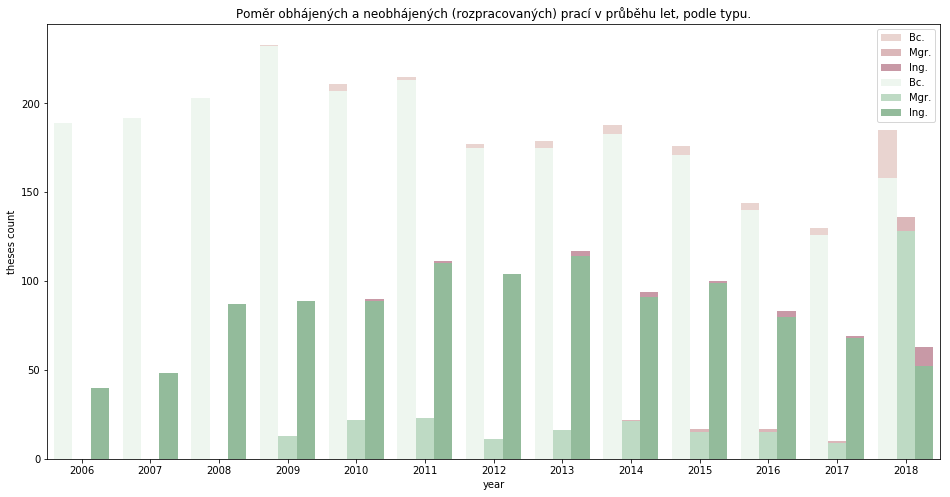

In [ ]:
dat = pd.DataFrame()
years = dt['year'].unique()
years.sort(axis=0)

dat['year'] = ""
dat['type'] = ""
dat['defended'] = 0
dat['other'] = 0
dat['all'] = 0
index=0
for year in years:
    for typ in types:
        count_def = len(dt[(dt['year'] == year) & (dt['defended'] == 1) & (dt['type'] == typ)])
        count_other = len(dt[(dt['year'] == year) & (dt['defended'] == 0) & (dt['type'] == typ)])
        dat.at[index, 'year']= str(year)
        dat.at[index, 'type']= str(typ)
        dat.at[index, 'defended']=count_def 
        dat.at[index, 'other']=count_other
        index +=1
    
dat['all'] = dat['defended'] + dat['other'] 
#display(dat)

plt.figure(figsize=(16,8)) 
plt.title("Poměr obhájených a neobhájených (rozpracovaných) prací v průběhu let, podle typu.")
ax = sns.barplot(x='year',data=dat, hue='type', y='all', palette=sns.cubehelix_palette(8))
ax2 = sns.barplot(x='year',data=dat, hue='type', y='defended', palette=sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95))

ax.set(xlabel='year', ylabel='theses count')
ax2.legend().set_visible(True)
plt.show()